In [1]:
import sympy
from sympy import  Matrix, symbols, latex, S
from sympy import  sin as Sin
from sympy import  cos as Cos
from sympy import  pi as Pi
from sympy.vector import CoordSys3D, Vector, matrix_to_vector, AxisOrienter, express
from IPython.display import Latex
import pandas as pd
from dataclasses import dataclass, field
import numpy as np

# Практическое занятие 12
# Компьютерный практикум по алгебре на Python
## Векторы
### Задание 1.
Задать систему координат с именем '1'.
Найти скалярное и векторное произведение векторов $a(-\cos(\pi/4), \sin(\pi/3), 1)$ и $b(2, -1, 3)$.

In [2]:
N = CoordSys3D('1')

a = -Cos(Pi / 4) * N.i + Sin(Pi / 3) * N.j + N.k
b = 2 * N.i -1 * N.j + 3 * N.k

display(a.dot(b), a.cross(b))

-sqrt(2) - sqrt(3)/2 + 3

(1 + 3*sqrt(3)/2)*1.i + (2 + 3*sqrt(2)/2)*1.j + (-sqrt(3) + sqrt(2)/2)*1.k

### Задание 2
Ввести безымянную систему координат $M$ и символы $\varphi$ и $c$.
Вычислить $5u\cdot(v - u)$ и $((2v + u)\times(v - 3u)) $,

$u = (\cos(\varphi), 2c - 5, \sin(2\varphi))$, $v = (\sin(\varphi), 2c  + 5, \cos(2\varphi))$.

Скалярное произведение обозначено $\cdot$, векторное $\times$.
Использовать  & и ^, скобки расставить как в условии, поскольку приоритет у & и ^ ниже, чем у + и -. Упростить полученное выражение.

In [3]:
M = CoordSys3D('')
from sympy.abc import phi, c

u = Cos(phi) * M.i + (2 * c - 5) * M.j + Sin(2 * phi) * M.k
v = Sin(phi) * M.i + (2 * c + 5) * M.j + Cos(2 * phi) * M.k

answer_2_1 = sympy.simplify((5 * u) & (v - u))
answer_2_2 = sympy.simplify((2 * v + u) ^ (v - 3 * u))

display(Latex(latex(answer_2_1)))
display(Latex(latex(answer_2_2)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 3
Упростить вектор $g(-2p^2 + 5pq - 3q^2, \cos(q) + 2\sin(q - \pi/2), \sin^2(p) - \cos^2(p))$.
Вывести на экран координаты упрощенного вектора, его длину и проекции на координатные оси

In [26]:
from sympy.abc import p, q

g = sympy.simplify((-2 * p**2 + 5*p*q - 3*q**2) * M.i + (Cos(q) + 2 * Sin(q - Pi/2)) * M.j + (Sin(p)**2 - Cos(p)**2) * M.k)
coords_dict = g.components
coords = [coords_dict[i] for i in coords_dict]

print('Координаты: ')
display(Latex(',\ '.join(map(latex, coords))))
print('\nДлина: ')
display(a.magnitude())
print('\Проекции: ')
display(M.i.projection(a), M.j.projection(a), M.k.projection(a))


Координаты: 


<IPython.core.display.Latex object>


Длина: 


3/2

\Проекции: 


(-sqrt(2)*Dot(.i, 1.i)/2 + sqrt(3)*Dot(.i, 1.j)/2 + Dot(.i, 1.k))*.i

(-sqrt(2)*Dot(.j, 1.i)/2 + sqrt(3)*Dot(.j, 1.j)/2 + Dot(.j, 1.k))*.j

(-sqrt(2)*Dot(.k, 1.i)/2 + sqrt(3)*Dot(.k, 1.j)/2 + Dot(.k, 1.k))*.k

### Задание  4
Преобразовать матрицу $\left(\begin{matrix}-q\\ p\\ q + p\end{matrix}\right)$ в вектор в системе координат из Заданий 1 и 2.

Вывести на экран матрицу и ее представления в обеих системах координат, а затем вывести только векторное представление при $q = -1, 0, 1, 2$ и $p = -10, 12$ на отдельных строках (использовать цикл, рассмотреть все пары значений)

In [47]:
from sympy.abc import p, q

b = Matrix([-q, p, q + p])

display(b)
print()
display(*map(Latex, map(':\ '.join, zip(('N', 'M'),
                                        map(latex, (matrix_to_vector(b, N),
                                                    matrix_to_vector(b, M)))))))
print()

for i in (-1, 0, 1, 2):
    for j in (-10, 12):
        new_b = b.subs(q, i).subs(p, j)
        res = matrix_to_vector(new_b, M)
        display(Latex(fr"""\text{{q =\ }} {latex(i)}, {{\ p =\ }} {latex(j)}, {{\ b:\ }}{latex(res)}"""))
        print()

Matrix([
[   -q],
[    p],
[p + q]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 5.
Ввести новую систему координат $S5$, которая получается поворотом системы координат $M$ из Задания 2 на угол $\pi/4$ относительно оси $j$ по часовой стрелке.
Определить вектор $b5$ на основе матрицы из Задания 4 в соответствии с системой координат M, затем получить представление в матричном виде вектора $b5\_S5$ в системе координат $S5$.  Вывести на экран матрицу поворота, вектор $b5$ в системе координат $M$  и $S5$.

In [55]:
S5 = M.orient_new_axis('S5', - sympy.pi / 4, M.j)

b5 = matrix_to_vector(b, M)
b5_S5 = b5.to_matrix(S5)
R_matr = M.rotation_matrix(S5)
display(*map(Latex, map('\ =\ '.join,
                        zip(('R\_matr', 'b5', 'b5\_S5'),
                            map(latex,
                                (R_matr,
                                 b5,
                                 b5_S5))))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 6.
Повернуть систему координат  M  из Задания 2 на $\pi/3$ по часовой стрелке относительно оси, определяемой вектором $(3, -4, 12)$. Выразить вектор b5 в новой системе координат.

In [69]:
S6 = M.orient_new_axis('S6', - sympy.pi / 3, 3 * M.i - 4 * M.j + 12 * M.k)

b6 = matrix_to_vector(b5.to_matrix(S5), S5)
b6_S6 = sympy.simplify(matrix_to_vector(b6.to_matrix(S6), S6))
display(b6_S6)

(-8*sqrt(3)*p/13 + 12*p/169 - 71*q/169 - 2*sqrt(3)*q/13)*S6.i + (-3*sqrt(3)*p/26 + 137*p/338 - 15*sqrt(3)*q/26 - 18*q/169)*S6.j + (3*sqrt(3)*p/26 + 265*p/338 - 2*sqrt(3)*q/13 + 277*q/338)*S6.k

### Задание 7*.
Составить класс dataclass векторов в пространстве, имя класса my_vect.

**Обязательные переменные класса** coord_sys_name - имя системы координат и coordinates - кортеж из координат.

**Переременная со значением по умолчанию** : coord_sys - система координат в пространстве, по умолчанию None

**Атрибуты класса:** get_coord_sys и vector

**Метод класса:** characts

get_coord_sys проверяет, заполнена ли переменная coord_sys, если coord_sys равна None, то заполняет coord_sys в соответствии и именем coord_sys_name и возвращает значение coord_sys

vector возвращает вектор в системе координат coord_sys

characts возвращает координаты вектора, длину и нормализованный вектор  (по умолчанию координаты вектора возвращать в виде словаря, но предусмотреть возможность возвращать координаты в виде кортежа, np.array и списка, для этого нужно использовать необязательный аргумент)

Из файла 'task_12_7.xlsx' считать координаты векторов, составить векторы my_vect и вывести на экран на отдельных строках полученные экземпляры и характеристики  characts этих векторов. При этом координаты векторов из 1, 2 и 5 строки файла выводить в виде списка, из 3 строки в виде словаря, из 4 строки в виде np.array, а из остальных строк в виде кортежа.

### Индивидуальное задание.
Ввести безымянную систему координат XYZ, задать в ней векторы $v_1$ и $v_2$. Построить новую систему координат XYZ1 с именем Name поворотом  XYZ на $\alpha$ по или против часовой стрелки относительно оси, определяемой вектором $b$, выразить векторы $v_1$ и $v_2$ в новой системе координат. Найти скалярное и векторное произведение векторов в новой и старой системе координат. Выразить вектор, равный векторному произведению $v_1$ и $v_2$ в старой системе координат через новую систему координат, сравнить с векторным произведением $v_1$ и $v_2$, выраженных в новой системе координат.

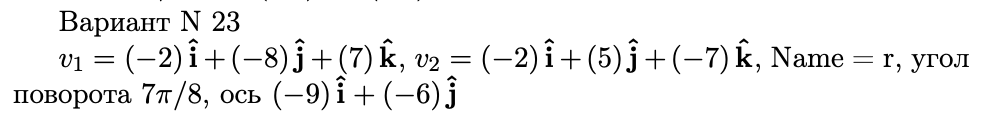

In [85]:
XYZ = CoordSys3D('')

v1 = -2 * XYZ.i - 8 * XYZ.j + 7 * XYZ.k
v2 = -2 * XYZ.i + 5 * XYZ.j - 7 * XYZ.k

XYZ1 = XYZ.orient_new_axis('r', sympy.pi * 7 / 8, -9 * XYZ.i - 6 * XYZ.j)

v1_new = sympy.simplify(matrix_to_vector(v1.to_matrix(XYZ1), XYZ1))
v2_new = sympy.simplify(matrix_to_vector(v2.to_matrix(XYZ1), XYZ1))

cross_v1_v2 = v1.cross(v2)
cross_v1_v2_new = v1_new.cross(v2_new)

display(v1)
display(v2)
display(Latex(fr"""\text{{Скалярное произведение:\ }} {latex(v1.dot(v2))}"""))
display(Latex(fr"""\text{{Векторное произведение:\ }} {latex(cross_v1_v2)}"""))
print()

display(v1_new)
display(v2_new)
display(Latex(fr"""\text{{Скалярное произведение:\ }} {latex(v1_new.dot(v2_new).simplify())}"""))
display(Latex(fr"""\text{{Векторное произведение:\ }} {latex(v1_new.cross(v2_new).simplify())}"""))
print()

cross_in_XYZ1 = sympy.simplify(matrix_to_vector(cross_v1_v2.to_matrix(XYZ1), XYZ1))

display(cross_in_XYZ1 == cross_v1_v2_new)

(-2)*.i + (-8)*.j + 7*.k

(-2)*.i + 5*.j + (-7)*.k

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

(-66/13 - 20*sqrt(sqrt(2) + 2)/13 + 7*sqrt(26 - 13*sqrt(2))/13)*r.i + (-44/13 - 21*sqrt(26 - 13*sqrt(2))/26 + 30*sqrt(sqrt(2) + 2)/13)*r.j + (-7*sqrt(sqrt(2) + 2)/2 - 10*sqrt(26 - 13*sqrt(2))/13)*r.k

(-7*sqrt(26 - 13*sqrt(2))/13 + 12/13 + 19*sqrt(sqrt(2) + 2)/13)*r.i + (-57*sqrt(sqrt(2) + 2)/26 + 8/13 + 21*sqrt(26 - 13*sqrt(2))/26)*r.j + (19*sqrt(26 - 13*sqrt(2))/26 + 7*sqrt(sqrt(2) + 2)/2)*r.k

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

False